# Human Ressources Analytics 3

**Loading csv files**

In [1]:
dataold <- read.csv("data/DATA_3.02_HR2.csv") # training dataset
datanew <- read.csv("data/DATA_4.02_HR3.csv") # test dataset

In [2]:
head(dataold)

,S,LPE,NP,ANH,TIC,Newborn,left
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,0.38,0.53,2,157,3,0,1
2,0.80,0.86,5,262,6,0,1
3,0.11,0.88,7,272,4,0,1
4,0.72,0.87,5,223,5,0,1
5,0.37,0.52,2,159,3,0,1
6,0.41,0.50,2,153,3,0,1


In [3]:
head(datanew)

,S,LPE,NP,ANH,TIC,Newborn
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0.86,0.69,4,105,4,1
2,0.52,0.98,4,209,2,0
3,0.84,0.60,5,207,2,0
4,0.60,0.65,3,143,2,1
5,0.85,0.57,3,227,2,0
6,0.82,0.61,4,246,3,0


**Exploring the "datanew"**

In [4]:
str(datanew)

'data.frame':	1000 obs. of  6 variables:
 $ S      : num  0.86 0.52 0.84 0.6 0.85 0.82 0.62 0.69 0.88 0.36 ...
 $ LPE    : num  0.69 0.98 0.6 0.65 0.57 0.61 0.53 0.8 0.68 0.65 ...
 $ NP     : int  4 4 5 3 3 4 3 3 5 5 ...
 $ ANH    : int  105 209 207 143 227 246 128 219 236 119 ...
 $ TIC    : int  4 2 2 2 2 3 4 3 3 5 ...
 $ Newborn: int  1 0 0 1 0 0 0 1 0 0 ...


In [5]:
summary(datanew)

       S               LPE               NP             ANH       
 Min.   :0.1200   Min.   :0.3600   Min.   :2.000   Min.   : 96.0  
 1st Qu.:0.5300   1st Qu.:0.5900   1st Qu.:3.000   1st Qu.:160.0  
 Median :0.6800   Median :0.7200   Median :4.000   Median :201.0  
 Mean   :0.6626   Mean   :0.7193   Mean   :3.781   Mean   :200.2  
 3rd Qu.:0.8500   3rd Qu.:0.8600   3rd Qu.:4.000   3rd Qu.:241.0  
 Max.   :1.0000   Max.   :1.0000   Max.   :6.000   Max.   :287.0  
      TIC           Newborn     
 Min.   :2.000   Min.   :0.000  
 1st Qu.:2.000   1st Qu.:0.000  
 Median :3.000   Median :0.000  
 Mean   :3.103   Mean   :0.197  
 3rd Qu.:4.000   3rd Qu.:0.000  
 Max.   :6.000   Max.   :1.000  

There are 1,000 employees in the new dataset. An employee is working 200 hours/month on average. They have spent 3.1 year in the company on average.

### Logistic Regression Model

Let's build a logistic regression model, in order to estimate the probability of leaving ('left') based on the other variables of the old dataset:

In [6]:
# Estimate the drivers of attrition 
logreg <- glm(left ~ ., family=binomial(logit), data=dataold)

# Summary of our Linear Regression Model
summary(logreg) 


Call:
glm(formula = left ~ ., family = binomial(logit), data = dataold)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1727  -0.5410  -0.3535  -0.1994   3.0949  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.2412448  0.1601334  -7.751 9.09e-15 ***
S           -3.8163201  0.1207448 -31.607  < 2e-16 ***
LPE          0.5044011  0.1809102   2.788   0.0053 ** 
NP          -0.3591952  0.0264709 -13.569  < 2e-16 ***
ANH          0.0037840  0.0006237   6.067 1.30e-09 ***
TIC          0.6187913  0.0271161  22.820  < 2e-16 ***
Newborn     -1.4851023  0.1128772 -13.157  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10813.5  on 11999  degrees of freedom
Residual deviance:  8508.9  on 11993  degrees of freedom
AIC: 8522.9

Number of Fisher Scoring iterations: 6


Then we use the fitted model and make predictions on the new dataset:

In [7]:
probaToLeave <- predict(logreg,newdata=datanew,type="response")

# Structure the prediction output in a dataframe
predattrition <- data.frame(probaToLeave)

head(predattrition)

,probaToLeave
,<dbl>
1,0.01441962
2,0.10529195
3,0.01946618
4,0.01821424
5,0.03997737
6,0.06224061


In [8]:
# Add a column to the predattrition dataframe containing the performance
predattrition$performance <- datanew$LPE
head(predattrition) 

,probaToLeave,performance
,<dbl>,<dbl>
1,0.01441962,0.69
2,0.10529195,0.98
3,0.01946618,0.60
4,0.01821424,0.65
5,0.03997737,0.57
6,0.06224061,0.61


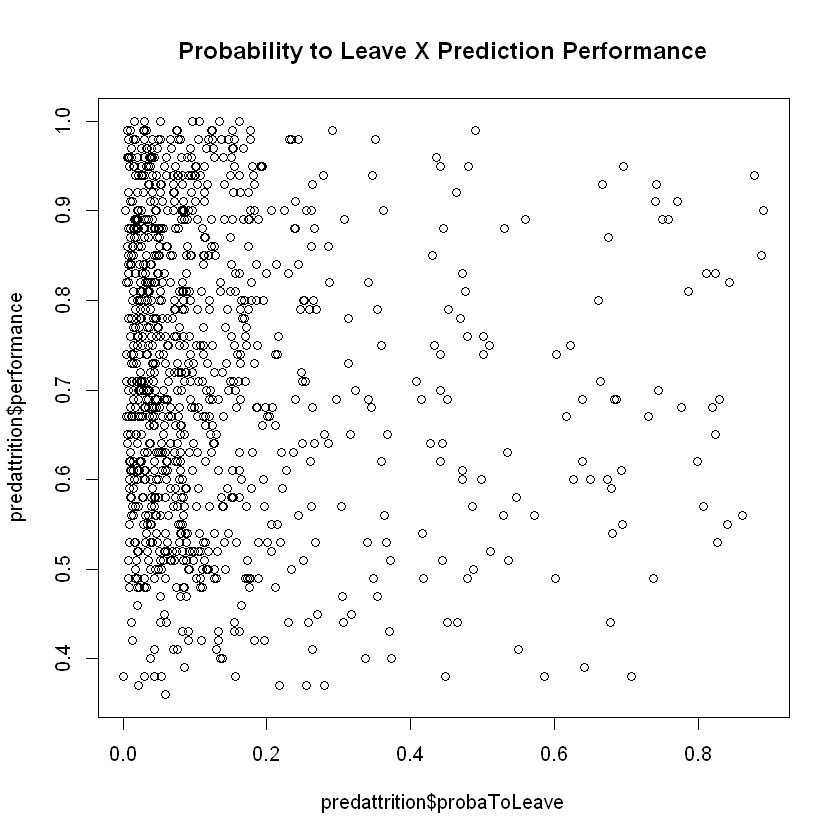

In [9]:
plot(predattrition$probaToLeave,predattrition$performance, main = "Probability to Leave X Prediction Performance")

In [10]:
library(ggplot2)

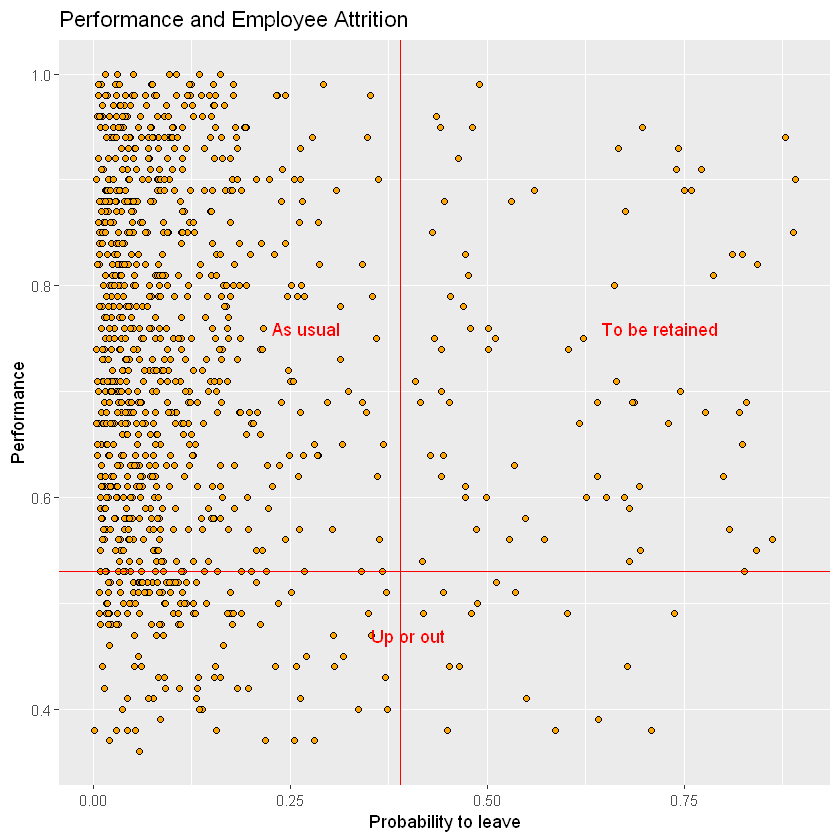

In [11]:
ggplot(data=predattrition, aes(x=probaToLeave,y=performance)) + 
  geom_point(colour = "black", fill = "orange", shape = 21) +  # shape 21 has a border 
  xlab("Probability to leave") +
  ylab("Performance") +
  ggtitle("Performance and Employee Attrition") +
  geom_vline(xintercept = 0.39, color='red') +
  geom_hline(yintercept = 0.53, color='red') +
  annotate("text", x = 0.27, y = 0.76, label = "As usual", color='red') +
  annotate("text", x = 0.4, y = 0.47, label = "Up or out", color='red') +
  annotate("text", x = 0.72, y = 0.76, label = "To be retained", color='red')

Employees that should be retained are those with high performance and high likelyhood to leave. Actions should be targeted towards this people.

We can define a priority score ('priority'), as performance x probability to leave:

In [12]:
predattrition$priority <- predattrition$performance * predattrition$probaToLeave
head(predattrition)

,probaToLeave,performance,priority
,<dbl>,<dbl>,<dbl>
1,0.01441962,0.69,0.009949535
2,0.10529195,0.98,0.103186110
3,0.01946618,0.60,0.011679708
4,0.01821424,0.65,0.011839255
5,0.03997737,0.57,0.022787099
6,0.06224061,0.61,0.037966774


And then we rank the employees who should be retained by decreasing priority score:

In [13]:
#reordering the dataframe
orderpredattrition <- predattrition[order(predattrition$priority,decreasing = TRUE),]
head(orderpredattrition)

,probaToLeave,performance,priority
,<dbl>,<dbl>,<dbl>
928,0.8784943,0.94,0.8257846
588,0.8916330,0.90,0.8024697
477,0.8882958,0.85,0.7550514
684,0.7715824,0.91,0.7021400
235,0.8432307,0.82,0.6914492
732,0.7424256,0.93,0.6904558


This allows to focus HR efforts for employee retention.

### Questions

**1) What is the ID of the employee that is the less likely to leave according to the estimated model?**

In [14]:
head( predattrition[order(predattrition$probaToLeave),] )

,probaToLeave,performance,priority
,<dbl>,<dbl>,<dbl>
572,0.001336826,0.38,0.0005079939
388,0.004036227,0.90,0.0036326044
374,0.004456290,0.74,0.0032976543
810,0.004561275,0.67,0.0030560543
513,0.004920710,0.71,0.0034937043
288,0.005409867,0.82,0.0044360913


According to the model, employee #572 is the less likely to leave.

**2) What is the ID of the employee that is the less likely to leave according to the estimated model and who has a performance larger than 0.90?**

In [15]:
sub_attrition <- subset(predattrition, performance>0.90)

head(sub_attrition[order(sub_attrition$probaToLeave),] )

,probaToLeave,performance,priority
,<dbl>,<dbl>,<dbl>
322,0.005690086,0.96,0.005462483
761,0.006229770,0.99,0.006167472
886,0.006957936,0.92,0.006401301
156,0.007112110,0.98,0.006969868
865,0.007950425,0.96,0.007632408
307,0.008591105,0.95,0.008161549


According to the model, employee #322 is the less likely to leave and has a performance larger than 0.90.